# KNN algorithm on crime data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
balance_data = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
balance_data = balance_data.replace('?', '0')
balance_data.shape

(2215, 147)

In [3]:
violent_crimes = list(map(float, balance_data.ViolentCrimesPerPop))
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)
violent_crimes_mean

530.3040045146731

In [4]:
balance_data['mean_violent_crimes'] = violent_crimes_mean

In [5]:
balance_data['violent_crime_occurence'] = np.where(violent_crimes>=balance_data['mean_violent_crimes'], '1', '0')

In [7]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
balance_data = balance_data[['population','householdsize','racePctWhite','racepctblack','racePctHisp','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
balance_data

,population,householdsize,racePctWhite,racepctblack,racePctHisp,medIncome,PctUnemployed,PolicReqPerOffic,murders,rapes,burglaries,robberies,violent_crime_occurence
0,11980,3.10,91.78,1.37,1.88,75122,2.70,0,0,0,14,1,0
1,23123,2.82,95.57,0.80,0.85,47917,2.43,0,0,1,57,5,0
2,29344,2.43,94.33,0.74,2.35,35669,4.01,0,3,6,274,56,0
3,16656,2.40,97.35,1.70,0.70,20580,9.86,0,0,10,225,10,0
4,11245,2.76,89.16,0.53,0.52,17390,9.08,0,0,0,91,4,0
5,140494,2.45,95.65,2.51,0.95,21577,5.72,0,7,77,2094,136,0
6,28700,2.60,96.57,1.60,1.10,42805,4.85,0,0,4,110,9,0
7,59459,2.45,84.87,14.20,0.63,23221,8.19,0,8,34,608,98,0
8,74111,2.46,97.11,0.35,0.73,25326,4.18,0,0,35,425,16,0
9,103590,2.62,67.60,23.14,16.35,17852,8.39,370.9,29,141,2397,453,1


## Till the above steps it is data pre-processing and cleaning as explained in the previous algorithms

## In order to apply KNN on the data set the features taken are 'racePctWhite', 'PctUnemployed' and train the model to classify data based on voilent crime occurrence.

In [8]:
X_KNN = balance_data.iloc[:, [2,6]].values
Y_KNN = balance_data.iloc[:, 12].values

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(X_KNN, Y_KNN, test_size = 0.30, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_KNN = sc.fit_transform(X_train_KNN)
X_test_KNN = sc.transform(X_test_KNN)

In [11]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_KNN, Y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# Predicting the Test set results
Y_Pred_KNN = classifier.predict(X_test_KNN)

In [14]:
ac=accuracy_score(Y_test_KNN,Y_Pred_KNN)*100

In [15]:
ac

79.84962406015038

## The accuracy of the model is 79.84. We have split the data into 70-30.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


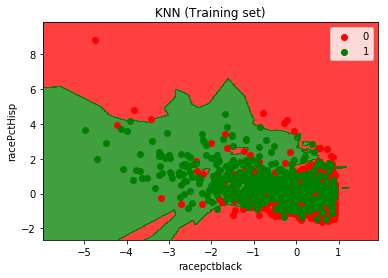

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_KNN, Y_train_KNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


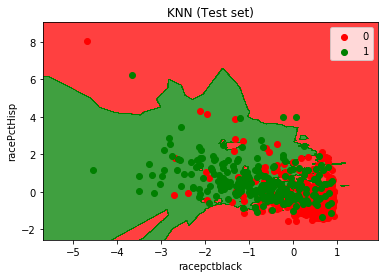

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_KNN, Y_test_KNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

The above is the visualization of the test data. From all the features in the data set the features which had an impact towards the violence crime occurrence are 'racePctWhite', 'PctUnemployed'. Now based on these two features the model was trained and finally tested. We can clealry see that the model was able to classify most of the points accurately based on the crime occurence but we can also some noise where the model could not predict certain crime occurrences.

# Confusion Matrix

Model Accuracy for Random Forest: 0.7984962406015037


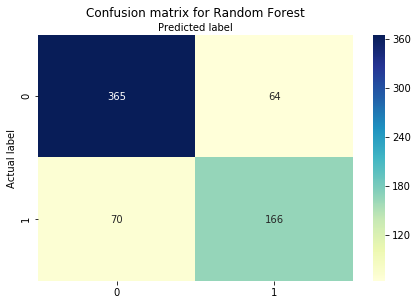

In [18]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_KNN, Y_Pred_KNN)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_KNN, Y_Pred_KNN))

